In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data into dataframe
df = pd.read_csv('OBU_fakedata.csv')
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,D,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,5,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N


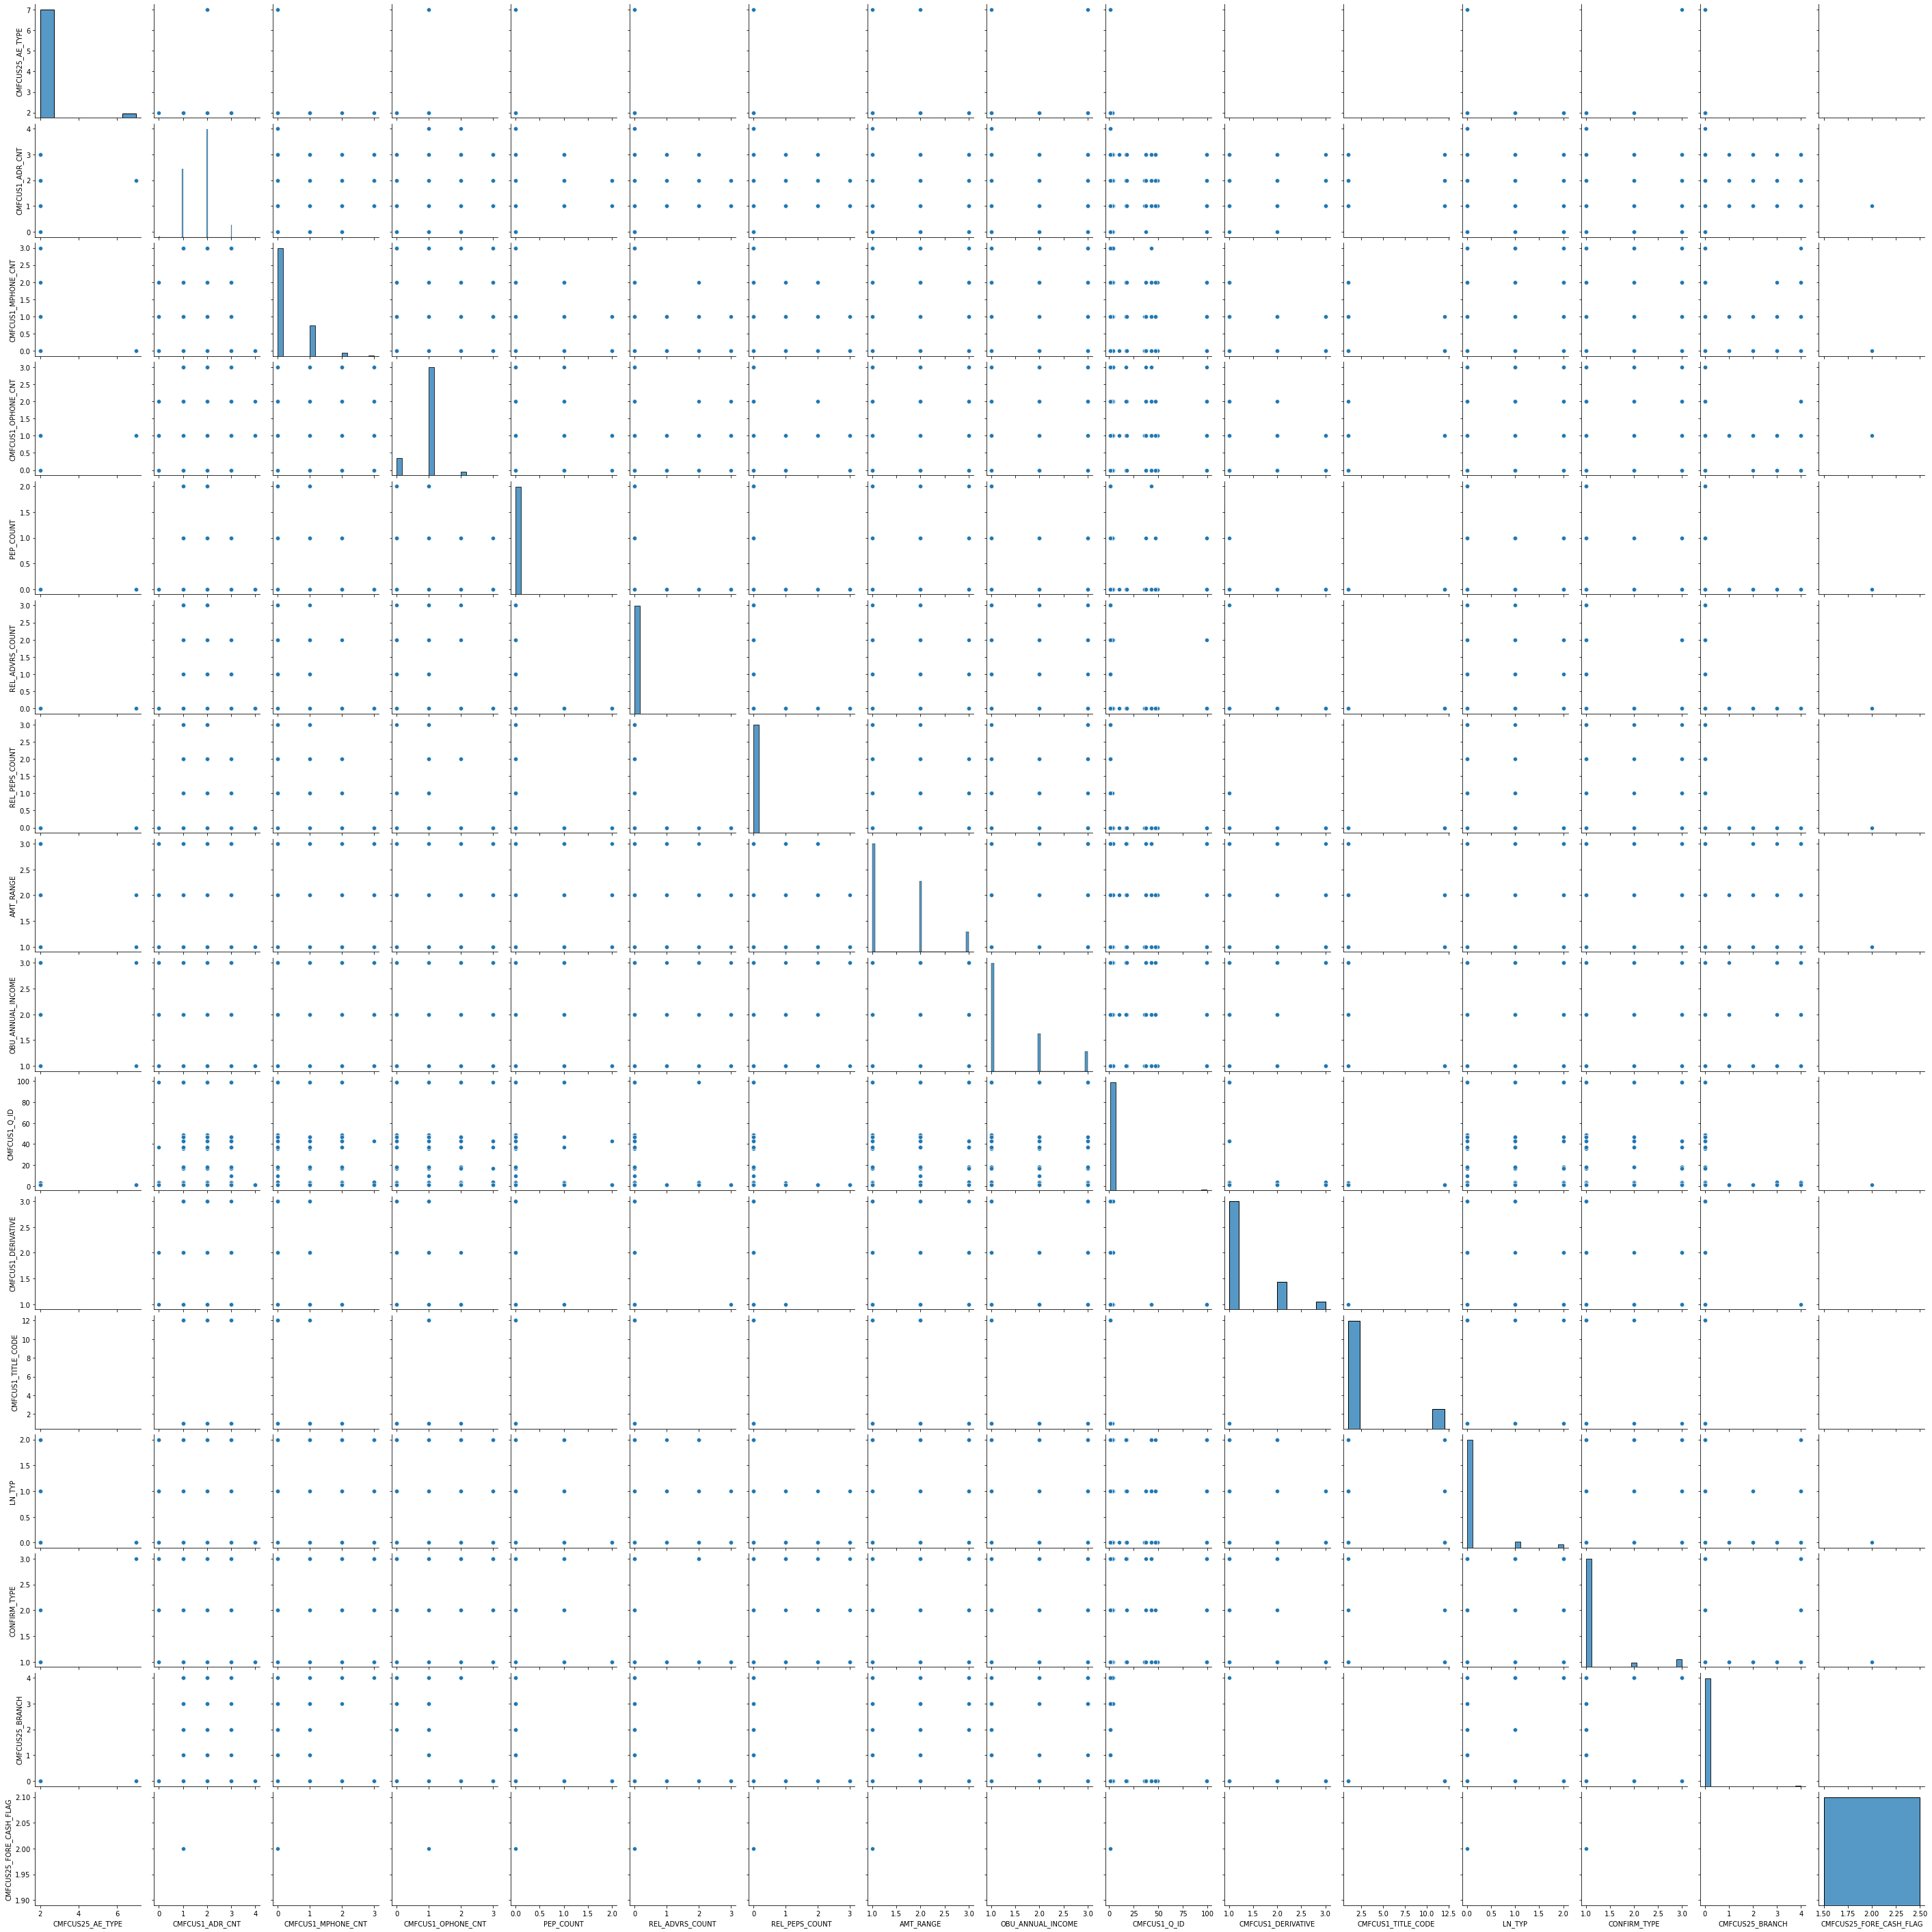

In [3]:
sns.pairplot(df)

In [3]:
# Fill NA with 'N' in specific columns accroding by our judgement
df[['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG','CMFCUS1_NOTAX_FLAG','CMFCUS1_FINANCIAL_ACT','CUST_PANA','CUST_THIRD','CUST_ADVRS','CUST_BAHA','CUST_PARA','CMFCUS25_AE_TYPE','DP_FG',
   'LN_FG','IX_FG','BD_FG','FD_FG','WM_FG','TR_FG','EB_FG','CD_FG','OT_FG','TRUST_YN']] \
    = df[['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG','CMFCUS1_NOTAX_FLAG','CMFCUS1_FINANCIAL_ACT','CUST_PANA','CUST_THIRD','CUST_ADVRS','CUST_BAHA','CUST_PARA','CMFCUS25_AE_TYPE','DP_FG',
   'LN_FG','IX_FG','BD_FG','FD_FG','WM_FG','TR_FG','EB_FG','CD_FG','OT_FG','TRUST_YN']].fillna(value='N')
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT
0,N,Y,N,N,v,N,N,N,N,N,...,D,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
1,N,Y,N,Y,v,N,N,N,N,N,...,NaN,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
2,N,Y,N,N,v,N,N,N,N,v,...,5,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
3,N,Y,N,N,v,N,N,N,N,N,...,E,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
4,N,Y,N,Y,v,N,v,N,N,N,...,E,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,N,v,N,N,N,N,N,...,E,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N
80128,N,Y,N,N,v,N,N,N,N,N,...,1,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N
80129,N,Y,N,Y,v,v,N,N,N,N,...,NaN,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N
80130,N,Y,N,Y,v,N,N,N,N,N,...,NaN,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N


In [4]:
# Drop those columns useless
df = df.drop(['CMFCUS1_DERIVATIVE', 'CMFCUS1_TITLE_CODE','CMFCUS25_FORE_CASH_FLAG'], axis=1)
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS25_SRT_MOODYS_RATING,CMFCUS25_SRT_FITCH_RATING,CMFCUS1_Q_ID,CMFCUS1_PURPOSE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,SAR_ALERT
0,N,Y,N,N,v,N,N,N,N,N,...,NaN,NaN,3.0,D,1Z,0.0,1.0,Z,0.0,N
1,N,Y,N,Y,v,N,N,N,N,N,...,NaN,NaN,1.0,NaN,1Z,0.0,1.0,Z,0.0,N
2,N,Y,N,N,v,N,N,N,N,v,...,NaN,NaN,1.0,5,1Z,0.0,1.0,Z,0.0,N
3,N,Y,N,N,v,N,N,N,N,N,...,NaN,NaN,1.0,E,1Z,0.0,1.0,Z,0.0,N
4,N,Y,N,Y,v,N,v,N,N,N,...,NaN,NaN,1.0,E,1Z,0.0,1.0,NaN,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,N,v,N,N,N,N,N,...,NaN,NaN,1.0,E,1Z,0.0,3.0,Z,NaN,N
80128,N,Y,N,N,v,N,N,N,N,N,...,NaN,NaN,1.0,1,1Z,2.0,NaN,NaN,0.0,N
80129,N,Y,N,Y,v,v,N,N,N,N,...,NaN,NaN,1.0,NaN,5Z,0.0,1.0,NaN,NaN,N
80130,N,Y,N,Y,v,N,N,N,N,N,...,NaN,NaN,1.0,NaN,1Z,0.0,NaN,Z,0.0,N


In [5]:
#信評 (待修正)
df['CMFCUS25_SP_RATING']=df['CMFCUS25_SP_RATING'].map( 
   {'A': 'invest', 'A+': 'invest', 'A-': 'invest', 
    'BBB-': 'invest', 'AA+': 'invest', 'BBB+': 'invest', 'AA-': 'invest'})

df['CMFCUS25_MOODYS_RATING']=df['CMFCUS25_MOODYS_RATING'].map( 
   {'A1': 'invest', 'Aa3': 'invest', 
    'A2': 'invest', 'A3': 'invest', '(P)A1': 'invest', 
    'Aa1':'invest', 'Aaa':'invest', 'Baa1': 'invest', 'A3-': 'invest'})  ###(P)A1','A3-'

#短期S&P
df['CMFCUS25_SRT_SP_RATING']=df['CMFCUS25_SRT_SP_RATING'].map( 
  {'A-1': 'invest', 'A-2': 'invest', 'A-3': 'invest', 'A-1+': 'invest'})


df['CMFCUS25_SRT_MOODYS_RATING']=df['CMFCUS25_SRT_MOODYS_RATING'].map( 
  {'P-1': 'invest', 'P-2': 'invest', 'P-3': 'invest'})


df['CMFCUS25_SRT_FITCH_RATING']=df['CMFCUS25_SRT_FITCH_RATING'].map( 
  {'F1': 'invest', 'F1+': 'invest', 'F3': 'invest', 'F2': 'invest', 'F2-': 'invest'})

In [6]:
# Create a column to count the NAs
df['NA count'] = df.isnull().sum(axis=1)
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS25_SRT_FITCH_RATING,CMFCUS1_Q_ID,CMFCUS1_PURPOSE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,SAR_ALERT,NA count
0,N,Y,N,N,v,N,N,N,N,N,...,NaN,3.0,D,1Z,0.0,1.0,Z,0.0,N,10
1,N,Y,N,Y,v,N,N,N,N,N,...,NaN,1.0,NaN,1Z,0.0,1.0,Z,0.0,N,13
2,N,Y,N,N,v,N,N,N,N,v,...,NaN,1.0,5,1Z,0.0,1.0,Z,0.0,N,11
3,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,E,1Z,0.0,1.0,Z,0.0,N,13
4,N,Y,N,Y,v,N,v,N,N,N,...,NaN,1.0,E,1Z,0.0,1.0,NaN,0.0,N,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,E,1Z,0.0,3.0,Z,NaN,N,17
80128,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,1,1Z,2.0,NaN,NaN,0.0,N,14
80129,N,Y,N,Y,v,v,N,N,N,N,...,NaN,1.0,NaN,5Z,0.0,1.0,NaN,NaN,N,14
80130,N,Y,N,Y,v,N,N,N,N,N,...,NaN,1.0,NaN,1Z,0.0,NaN,Z,0.0,N,15


In [7]:
# Replace H,M,L to 3,2,1
df.loc[df['RISK_LEVEL'] == 'H', 'RISK_LEVEL'] = 3
df.loc[df['RISK_LEVEL'] == 'M', 'RISK_LEVEL'] = 2
df.loc[df['RISK_LEVEL'] == 'L', 'RISK_LEVEL'] = 1
df.loc[df['JOB_RISK'] == 'H', 'JOB_RISK'] = 3
df.loc[df['JOB_RISK'] == 'M', 'JOB_RISK'] = 2
df.loc[df['JOB_RISK'] == 'L', 'JOB_RISK'] = 1
df.loc[df['CMFCUS1_BUSINESS_CODE'] == 'H', 'CMFCUS1_BUSINESS_CODE'] = 3
df.loc[df['CMFCUS1_BUSINESS_CODE'] == 'M', 'CMFCUS1_BUSINESS_CODE'] = 2
df.loc[df['CMFCUS1_BUSINESS_CODE'] == 'L', 'CMFCUS1_BUSINESS_CODE'] = 1

'''
#L M H ->label
#行業對象別 風險等級
#'CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL'
for i in ['CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL','JOB_RISK']:
    df[i]=df[i].map({'H': 3, 'M': 2,'L': 1})
'''

df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS25_SRT_FITCH_RATING,CMFCUS1_Q_ID,CMFCUS1_PURPOSE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,SAR_ALERT,NA count
0,N,Y,N,N,v,N,N,N,N,N,...,NaN,3.0,D,1Z,0.0,1.0,Z,0.0,N,10
1,N,Y,N,Y,v,N,N,N,N,N,...,NaN,1.0,NaN,1Z,0.0,1.0,Z,0.0,N,13
2,N,Y,N,N,v,N,N,N,N,v,...,NaN,1.0,5,1Z,0.0,1.0,Z,0.0,N,11
3,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,E,1Z,0.0,1.0,Z,0.0,N,13
4,N,Y,N,Y,v,N,v,N,N,N,...,NaN,1.0,E,1Z,0.0,1.0,NaN,0.0,N,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,E,1Z,0.0,3.0,Z,NaN,N,17
80128,N,Y,N,N,v,N,N,N,N,N,...,NaN,1.0,1,1Z,2.0,NaN,NaN,0.0,N,14
80129,N,Y,N,Y,v,v,N,N,N,N,...,NaN,1.0,NaN,5Z,0.0,1.0,NaN,NaN,N,14
80130,N,Y,N,Y,v,N,N,N,N,N,...,NaN,1.0,NaN,1Z,0.0,NaN,Z,0.0,N,15


In [8]:
#convert those numbers not ordinal into categorical variable
df['CMFCUS25_BRANCH'] = df['CMFCUS25_BRANCH'].astype(str)
df['CONFIRM_TYPE'] = df['CONFIRM_TYPE'].astype(str)
df['LN_TYP'] = df['LN_TYP'].astype(str)
df['CMFCUS1_Q_ID'] = df['CMFCUS1_Q_ID'].astype(str)


In [9]:
#'''
#二元分類轉0,1
df['CMFCUS1_VIP_CODE']=df['CMFCUS1_VIP_CODE'].map({'N': 0, 'Y': 1})
df['CMFCUS1_BUSINESS_FLAG']=df['CMFCUS1_BUSINESS_FLAG'].map({'N': 0, 'Y': 1})
df['CMFCUS1_NOTAX_FLAG']=df['CMFCUS1_NOTAX_FLAG'].map({'N': 0, 'Y': 1})
df['CMFCUS1_FINANCIAL_ACT']=df['CMFCUS1_FINANCIAL_ACT'].map({'N': 0, 'Y': 1})
df['TRUST_YN']=df['TRUST_YN'].map({'N': 0, 'Y': 1})
df['CUST_PANA']=df['CUST_PANA'].map({'N': 0, 'Y': 1})
df['CUST_THIRD']=df['CUST_THIRD'].map({'N': 0, 'Y': 1})
df['CUST_ADVRS']=df['CUST_ADVRS'].map({'N': 0, 'Y': 1})
df['CUST_BAHA']=df['CUST_BAHA'].map({'N': 0, 'Y': 1})
df['CUST_PARA']=df['CUST_PARA'].map({'N': 0, 'Y': 1})
df['CUST_PANA']=df['CUST_PANA'].map({'N': 0, 'Y': 1})
df['DP_FG']=df['DP_FG'].map({'N': 0, 'v': 1})
df['LN_FG']=df['LN_FG'].map({'N': 0, 'v': 1})
df['IX_FG']=df['IX_FG'].map({'N': 0, 'v': 1})
df['BD_FG']=df['BD_FG'].map({'N': 0, 'v': 1})
df['FD_FG']=df['FD_FG'].map({'N': 0, 'v': 1})
df['WM_FG']=df['WM_FG'].map({'N': 0, 'v': 1})
df['TR_FG']=df['TR_FG'].map({'N': 0, 'v': 1})
df['EB_FG']=df['EB_FG'].map({'N': 0, 'v': 1})
df['CD_FG']=df['CD_FG'].map({'N': 0, 'v': 1})
df['OT_FG']=df['OT_FG'].map({'N': 0, 'v': 1})

In [10]:
#SAR_ALERT
df['SAR_ALERT']=np.where(df['SAR_ALERT']=='Y',1,0)

In [11]:
#'''
#除了數字之外全部轉dummy #所有選項皆會被獨立
df_dum=df[[ #'CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG', 
       #'CMFCUS1_NOTAX_FLAG',
       #'CMFCUS1_FINANCIAL_ACT', 
       #'DP_FG', 'LN_FG', 'IX_FG', 'BD_FG', 'FD_FG',
       #'WM_FG', 'TR_FG', 'EB_FG', 'CD_FG', 'OT_FG', 
       #'TRUST_YN', 
       'CONFIRM_YN',
       'COMPLEX_CS_FG', 'AUTHORIZED', 'BEARER_SHARE', 'ISSUE_BEARER',
       'SOLE_CORP', 'TRUST_HOLDER', #'CDD_STATUS',
       #'CUST_PANA', 'CUST_THIRD', 'CUST_ADVRS', 'CUST_BAHA', 'CUST_PARA', 
       'CMFCUS25_AE_TYPE',
       'CMFCUS25_FOREIGN_COMPANY', 'CMFCUS25_FOREIGN_ENTITY',
       'CMFCUS25_CERTI_FLAG', 'CMFCUS25_TAXFREE_FLAG',
       'CMFCUS25_CREATIVE_FLAG', 'CMFCUS25_OSU_FLAG', 'CMFCUS25_PUBLIC_CMPY',
       #'CMFCUS1_ADR_CNT', 'CMFCUS1_MPHONE_CNT', 'CMFCUS1_OPHONE_CNT',
       #'PEP_COUNT', 'REL_ADVRS_COUNT', 'REL_PEPS_COUNT',
       #'CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL', 
       'AMT_RANGE', 'OBU_ANNUAL_INCOME',
       #'JOB_RISK', 'CMFCUS25_SP_RATING', 'CMFCUS25_MOODYS_RATING',
       #'CMFCUS25_SRT_SP_RATING', 'CMFCUS25_SRT_MOODYS_RATING',
       #'CMFCUS25_SRT_FITCH_RATING', 
       'CMFCUS1_Q_ID', 'CMFCUS1_PURPOSE',
       #'CMFCUS1_DERIVATIVE', 'CMFCUS1_TITLE_CODE',NA過高刪除
       'CUST_TYP', 'LN_TYP',
       'CONFIRM_TYPE', 'CORP_TYPE', 'CMFCUS25_BRANCH', 'CMFCUS25_SP_RATING', 'CMFCUS25_MOODYS_RATING',
       'CMFCUS25_SRT_SP_RATING','CMFCUS25_SRT_MOODYS_RATING','CMFCUS25_SRT_FITCH_RATING'
       #'CMFCUS25_FORE_CASH_FLAG'
        ]]
       
df_dummy=pd.get_dummies(df_dum,dummy_na=True, drop_first=True)

df_ord=df[['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG','CMFCUS1_NOTAX_FLAG','CMFCUS1_FINANCIAL_ACT',
       'DP_FG', 'LN_FG', 'IX_FG', 'BD_FG', 'FD_FG',
       'WM_FG', 'TR_FG', 'EB_FG', 'CD_FG', 'OT_FG','TRUST_YN',
       'CUST_PANA', 'CUST_THIRD', 'CUST_ADVRS', 'CUST_BAHA', 'CUST_PARA',
       'CMFCUS1_ADR_CNT', 'CMFCUS1_MPHONE_CNT', 'CMFCUS1_OPHONE_CNT',
       'PEP_COUNT', 'REL_ADVRS_COUNT', 'REL_PEPS_COUNT',
       'CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL', 
       'JOB_RISK','NA count',
        ]]
df_new=pd.concat([df_dummy, df_ord],axis=1)
df_new_class=pd.concat([df_new, df['SAR_ALERT']],axis=1)

In [12]:
#''' Option A: all contents are not numbers will turn into Dummy
df_new_class

,AMT_RANGE,OBU_ANNUAL_INCOME,CONFIRM_YN_Y,CONFIRM_YN_nan,COMPLEX_CS_FG_Y,COMPLEX_CS_FG_nan,AUTHORIZED_Y,AUTHORIZED_nan,BEARER_SHARE_Y,BEARER_SHARE_nan,...,CMFCUS1_MPHONE_CNT,CMFCUS1_OPHONE_CNT,PEP_COUNT,REL_ADVRS_COUNT,REL_PEPS_COUNT,CMFCUS1_BUSINESS_CODE,RISK_LEVEL,JOB_RISK,NA count,SAR_ALERT
0,1.0,3.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,2,3,2,10,0
1,1.0,1.0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,2,2,1,13,0
2,NaN,3.0,0,1,0,1,0,0,0,1,...,0,1,1,0,0,3,3,3,11,0
3,NaN,1.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,2,3,13,0
4,1.0,1.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,2,2,2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,NaN,NaN,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,2,3,17,0
80128,NaN,1.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,2,3,3,14,0
80129,NaN,NaN,1,0,0,0,0,1,1,0,...,0,1,0,0,0,1,3,3,14,0
80130,1.0,NaN,0,1,0,0,0,1,0,1,...,1,1,0,0,0,2,2,3,15,0


In [13]:
#'''
df_new_class.to_csv('DF_ALL_DUMMY.csv')

In [14]:
'''
# Turn NA into Dummy for specific columns for all columns are not binary
# Will not turn other content into Dummy
df['CONFIRM_YN_NA'] = np.where(pd.isna(df['CONFIRM_YN']), 1, 0)
df['COMPLEX_CS_FG_NA'] = np.where(pd.isna(df['COMPLEX_CS_FG']), 1, 0)
df['AUTHORIZED_NA'] = np.where(pd.isna(df['AUTHORIZED']), 1, 0)
df['BEARER_SHARE_NA'] = np.where(pd.isna(df['BEARER_SHARE']), 1, 0)
df['ISSUE_BEARER_NA'] = np.where(pd.isna(df['ISSUE_BEARER']), 1, 0)
df['SOLE_CORP_NA'] = np.where(pd.isna(df['SOLE_CORP']), 1, 0)
df['TRUST_HOLDER_NA'] = np.where(pd.isna(df['TRUST_HOLDER']), 1, 0)
df['CMFCUS25_FOREIGN_COMPANY_NA'] = np.where(pd.isna(df['CMFCUS25_FOREIGN_COMPANY']), 1, 0)
df['CMFCUS25_FOREIGN_ENTITY_NA'] = np.where(pd.isna(df['CMFCUS25_FOREIGN_ENTITY']), 1, 0)
df['CMFCUS25_CERTI_FLAG_NA'] = np.where(pd.isna(df['CMFCUS25_CERTI_FLAG']), 1, 0)
df['CMFCUS25_TAXFREE_FLAG_NA'] = np.where(pd.isna(df['CMFCUS25_TAXFREE_FLAG']), 1, 0)
df['CMFCUS25_CREATIVE_FLAG_NA'] = np.where(pd.isna(df['CMFCUS25_CREATIVE_FLAG']), 1, 0)
df['CMFCUS25_OSU_FLAG_NA'] = np.where(pd.isna(df['CMFCUS25_OSU_FLAG']), 1, 0)
df['CMFCUS25_PUBLIC_CMPY_NA'] = np.where(pd.isna(df['CMFCUS25_PUBLIC_CMPY']), 1, 0)
df['OBU_ANNUAL_INCOME_NA'] = np.where(pd.isna(df['OBU_ANNUAL_INCOME']), 1, 0)
df['CMFCUS25_BRANCH_NA'] = np.where(pd.isna(df['CMFCUS25_BRANCH']), 1, 0)
df['CORP_TYPE_NA'] = np.where(pd.isna(df['CORP_TYPE']), 1, 0)
df['CONFIRM_TYPE_NA'] = np.where(pd.isna(df['CONFIRM_TYPE']), 1, 0)
df['LN_TYP_NA'] = np.where(pd.isna(df['LN_TYP']), 1, 0)
df['CMFCUS1_PURPOSE_NA'] = np.where(pd.isna(df['CMFCUS1_PURPOSE']), 1, 0)
df['CMFCUS1_Q_ID_NA'] = np.where(pd.isna(df['CMFCUS1_Q_ID']), 1, 0)
df['CMFCUS25_SP_RATING_NA'] = np.where(pd.isna(df['CMFCUS25_SP_RATING']), 1, 0)
df['CMFCUS25_MOODYS_RATING_NA'] = np.where(pd.isna(df['CMFCUS25_MOODYS_RATING']), 1, 0)
df['CMFCUS25_SRT_SP_RATING_NA'] = np.where(pd.isna(df['CMFCUS25_SRT_SP_RATING']), 1, 0)
df['CMFCUS25_SRT_MOODYS_RATING_NA'] = np.where(pd.isna(df['CMFCUS25_SRT_MOODYS_RATING']), 1, 0)
df['CMFCUS25_SRT_FITCH_RATING_NA'] = np.where(pd.isna(df['CMFCUS25_SRT_FITCH_RATING']), 1, 0)

df
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-14-a9948861b7df>, line 31)

In [ ]:
'''
df.to_csv('DF_NA_DUMMY.csv')